In [1]:
from datetime import datetime
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')


nifty_data = pd.read_csv('../ml-project-data/NIFTY_train.csv', header=0, 
                                                              parse_dates=['Date'], index_col=0, date_parser=parser)
nifty_data['Average'] = nifty_data.loc[: , "High":"Low"].mean(axis=1)

#nifty_data = nifty_data.drop(['Open', 'High', 'Low', 'Close'], axis=1)
nifty_data = nifty_data['Average']

In [3]:
nifty_data_test = pd.read_csv('../ml-project-data/NIFTY_test.csv', header=0, 
                                                              parse_dates=['Date'], index_col=0, date_parser=parser)
nifty_data_test['Average'] = nifty_data_test.loc[: , "High":"Low"].mean(axis=1)

In [4]:
model = ExponentialSmoothing(nifty_data, seasonal_periods=5, trend='add', seasonal='mul', damped=True).fit(optimized=True,use_boxcox='log')

C:\Users\Colossus\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [5]:
prediction = model.forecast(int(len(nifty_data_test)))

C:\Users\Colossus\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


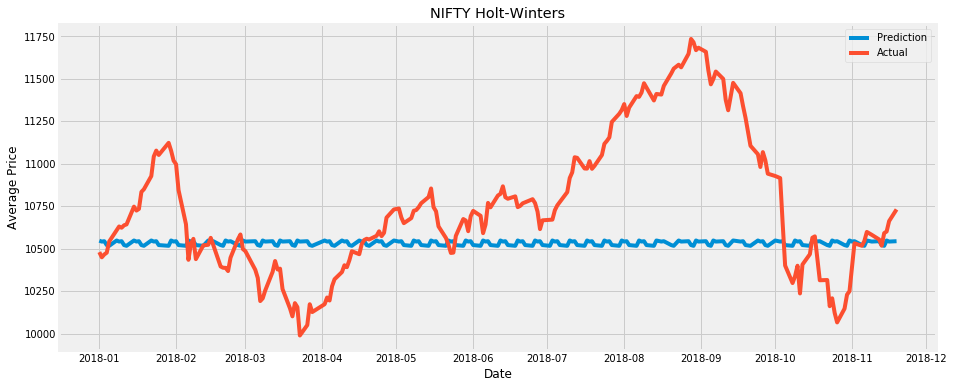

In [14]:
plt.figure(figsize=(14,6))
plt.plot(nifty_data_test.index, pd.DataFrame(prediction1.values, index = nifty_data_test.index), label="Prediction")
plt.plot(nifty_data_test['Average'].index, nifty_data_test['Average'], label="Actual")
plt.ylabel('Average Price')
plt.legend(loc="best")
plt.title("NIFTY Holt-Winters")
plt.xlabel('Date')
plt.show()

In [16]:
print('RMSE1: ', np.sqrt(mean_squared_error(prediction, nifty_data_test['Average'][:len(prediction)])))

print('MAPE1: ', np.mean(np.abs((nifty_data_test['Average'][:len(prediction)] - prediction.values) / nifty_data_test['Average'][:len(prediction)])) * 100)

RMSE1:  455.7077009218795
MAPE1:  3.0587489308351454


In [6]:
def company_HW(company):
    
    if(company == 1):
        TCS_data = pd.read_csv('../ml-project-data/TCS_train.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)
        TCS_data_test = pd.read_csv('../ml-project-data/TCS_test.csv', header=0, 
                                                              parse_dates=['Date'], index_col=2, date_parser=parser)
        title = "TCS Holt-Winters"
        
        
    if(company == 2):
        TCS_data = pd.read_csv('../ml-project-data/INFY_train.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)
        TCS_data_test = pd.read_csv('../ml-project-data/INFY_test.csv', header=0, 
                                                              parse_dates=['Date'], index_col=2, date_parser=parser)
        title = "INFY Holt-Winters"
        
        
    if(company == 3):
        TCS_data = pd.read_csv('../ml-project-data/TECHM_train.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)
        TCS_data_test = pd.read_csv('../ml-project-data/TECHM_test.csv', header=0, 
                                                              parse_dates=['Date'], index_col=2, date_parser=parser)
        title = "TECHM Holt-Winters"
        
    
    if(company == 4):
        TCS_data = pd.read_csv('../ml-project-data/HCL_train.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)
        TCS_data_test = pd.read_csv('../ml-project-data/HCL_test.csv', header=0, 
                                                              parse_dates=['Date'], index_col=2, date_parser=parser)
        title = "HCL Holt-Winters"
    
    
    if(company == 5):
        TCS_data = pd.read_csv('../ml-project-data/WIPRO_train.csv', header=0, 
                                                                  parse_dates=['Date'], index_col=2, date_parser=parser)
        TCS_data_test = pd.read_csv('../ml-project-data/WIPRO_test.csv', header=0, 
                                                              parse_dates=['Date'], index_col=2, date_parser=parser)
        title = "Wipro Holt-Winters"
        
        
    TCS_data = TCS_data['Average Price']
    
    TCS_data_test = TCS_data_test['Average Price']
    
    
    model_TCS = ExponentialSmoothing(TCS_data, seasonal_periods=5, trend='add', seasonal='mul', damped=True).fit(use_boxcox=False,optimized=True)
    
    

    prediction_TCS = model_TCS.forecast(int(len(TCS_data_test)))
    
    
    plt.figure(figsize=(14,6))
    plt.plot(TCS_data_test.index, pd.DataFrame(prediction_TCS.values, index = TCS_data_test.index), label="Prediction")
    plt.plot(TCS_data_test.index, TCS_data_test.values, label="Actual")
    plt.ylabel('Average Price')
    plt.legend(loc="best")
    plt.title(title)
    plt.xlabel('Date')
    plt.show()


    print('RMSE2: ', np.sqrt(mean_squared_error(prediction_TCS, TCS_data_test.values[:len(prediction_TCS)])))

    print('MAPE2: ', np.mean(np.abs((TCS_data_test.values[:len(prediction_TCS)] - prediction_TCS.values) / TCS_data_test.values[:len(prediction_TCS)])) * 100)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


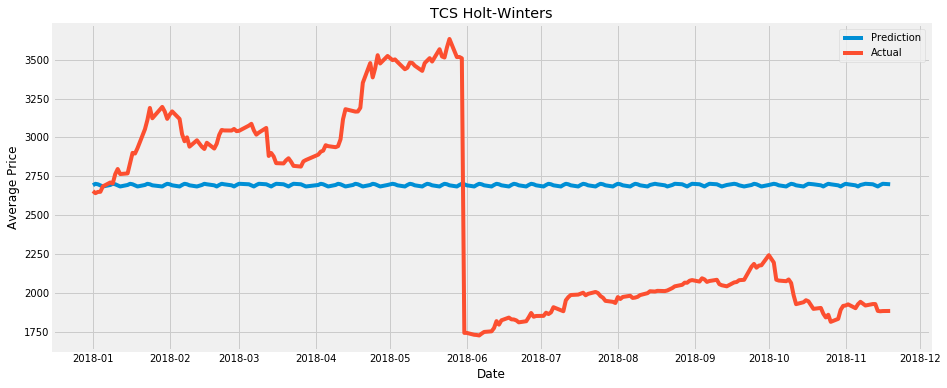

RMSE2:  641.0020335147968
MAPE2:  26.320737741126944


In [32]:
company_HW(1) #TCS

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


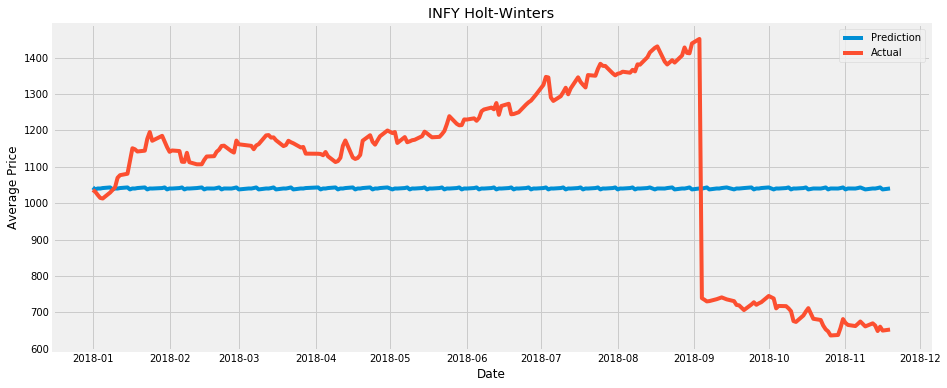

RMSE2:  245.3978697401031
MAPE2:  22.341646080440093


In [33]:
company_HW(2) #INFY

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


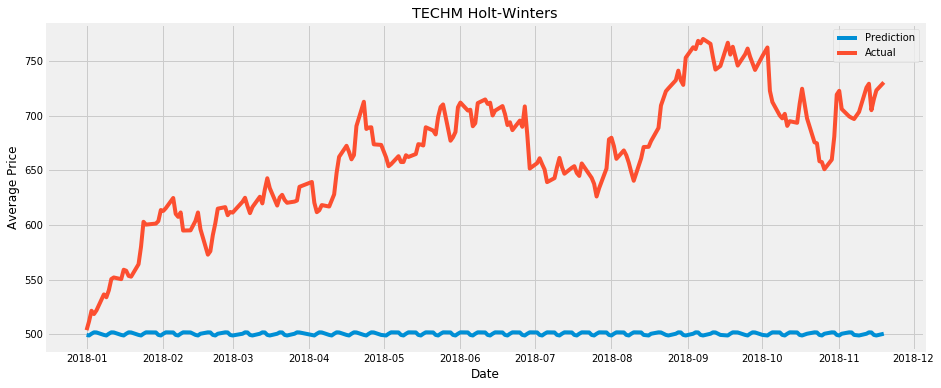

RMSE2:  172.3766079323786
MAPE2:  23.91833864638295


In [34]:
company_HW(3) #TECHM

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


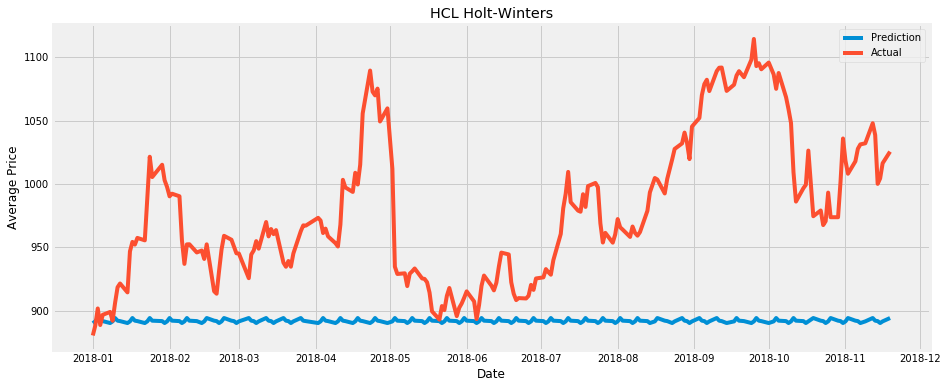

RMSE2:  102.04930035387645
MAPE2:  8.429397185125426


In [35]:
company_HW(4) #HCL

C:\Users\Colossus\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Colossus\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


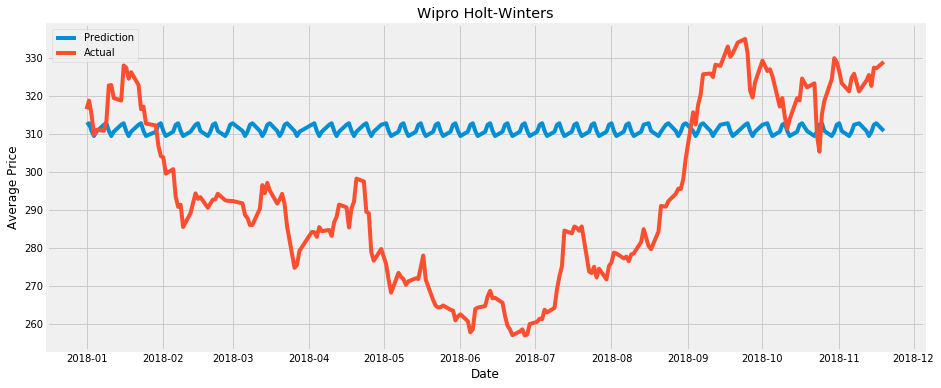

RMSE2:  28.802996139471187
MAPE2:  8.841081157580465


In [7]:
company_HW(5) #WIPRO